In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [185]:
data = pd.read_csv("ifood_df.csv")
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [187]:
float_rows = data[data['Income'] %1 != 0]
print(float_rows)

Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age, Customer_Days, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD, MntTotal, MntRegularProds, AcceptedCmpOverall]
Index: []

[0 rows x 39 columns]


In [188]:
data['Income'] = data['Income'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [189]:
# Let's create Customer segment column. 

data['Customer_Segment'] = pd.qcut(data['MntTotal'], q=3, labels= ['Low','Mid','High'])
data['Customer_Segment']

0       High
1        Low
2        Mid
3        Low
4        Mid
        ... 
2200    High
2201     Mid
2202    High
2203    High
2204     Mid
Name: Customer_Segment, Length: 2205, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']

In [190]:
# Creating Frequency column

data['Frequency'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
data['Frequency']

0       25
1        6
2       21
3        8
4       19
        ..
2200    18
2201    22
2202    19
2203    23
2204    11
Name: Frequency, Length: 2205, dtype: int64

In [191]:
# Recency score (lower recency is better)
data['R_score'] = pd.qcut(data['Recency'], q=3, labels= [3, 2, 1])

# Frequency score (more frequent is better)
data['F_score'] = pd.qcut(data['Frequency'].rank(method="first"), q=3, labels= [1, 2, 3])

# Monetary score (more spending is better)
data['M_score'] = pd.qcut(data['MntTotal'], q=3, labels= [1, 2, 3])

print(data['R_score'], data['F_score'], data['M_score'])

0       2
1       2
2       3
3       3
4       1
       ..
2200    2
2201    2
2202    1
2203    3
2204    2
Name: R_score, Length: 2205, dtype: category
Categories (3, int64): [3 < 2 < 1] 0       3
1       1
2       3
3       1
4       2
       ..
2200    2
2201    3
2202    3
2203    3
2204    2
Name: F_score, Length: 2205, dtype: category
Categories (3, int64): [1 < 2 < 3] 0       3
1       1
2       2
3       1
4       2
       ..
2200    3
2201    2
2202    3
2203    3
2204    2
Name: M_score, Length: 2205, dtype: category
Categories (3, int64): [1 < 2 < 3]


In [192]:
data['RFM_Score'] = data['R_score'].astype('str') + data['F_score'].astype('str') + data['M_score'].astype('str')
data['RFM_Score']

0       233
1       211
2       332
3       311
4       122
       ... 
2200    223
2201    232
2202    133
2203    333
2204    222
Name: RFM_Score, Length: 2205, dtype: object

In [193]:
def segment_me(row):
    if row['RFM_Score'] in ['333', '332', '323']:
        return 'Champions' # CHAMPIONS: Recent, Frequent, and High Spenders
    elif row['RFM_Score'] in ['311', '312', '313']:
        return 'At Risk' # AT RISK: Not recent, low frequency/spend — could be slipping away
    elif row['RFM_Score'] in ['133', '233']:
        return 'Big Spenders' # BIG SPENDERS: High monetary value, but maybe not very recent or frequent
    elif row['RFM_Score'] in ['111', '112']:
        return 'Lost' # LOST: Haven’t bought in a long time, not frequent, low spending
    else:
        return 'Potential' # POTENTIAL: Mid-range customers who could become loyal with attention
    
data['RFM_Segment'] = data.apply(segment_me,axis=1)
data['RFM_Segment']

0       Big Spenders
1          Potential
2          Champions
3            At Risk
4          Potential
            ...     
2200       Potential
2201       Potential
2202    Big Spenders
2203       Champions
2204       Potential
Name: RFM_Segment, Length: 2205, dtype: object

In [194]:
# How many customers are in each segment?
segment_counts = data['RFM_Segment'].value_counts()
print(segment_counts)

RFM_Segment
Potential       1047
Big Spenders     340
Champions        321
At Risk          258
Lost             239
Name: count, dtype: int64


In [195]:
# What’s the average revenue, frequency, and recency for each segment?
segment_summary = data.groupby('RFM_Segment')[['Recency', 'Frequency', 'MntTotal']].mean().round(2)
print(segment_summary)

              Recency  Frequency  MntTotal
RFM_Segment                               
At Risk         15.78       6.29     49.02
Big Spenders    65.56      24.48   1280.61
Champions       15.78      21.86   1106.87
Lost            82.59       6.37     48.10
Potential       54.34      13.70    406.92


In [196]:
# Which segments response to campaigns most?
# Response rate per segment
response_rate = data.groupby('RFM_Segment')['Response'].mean().round(2)
print(response_rate)

RFM_Segment
At Risk         0.15
Big Spenders    0.21
Champions       0.34
Lost            0.02
Potential       0.11
Name: Response, dtype: float64


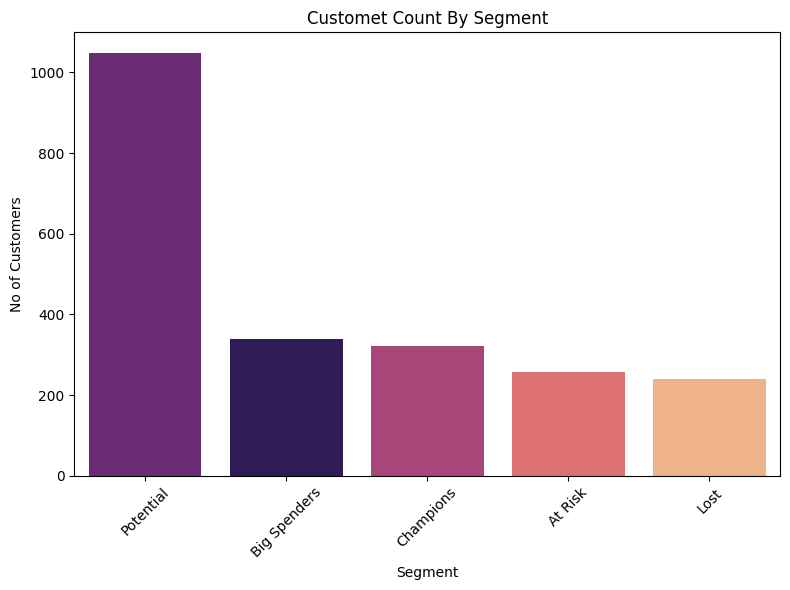

In [197]:
# Customer count by Segment

plt.figure(figsize=(8,6))
sns.countplot(data=data, x= 'RFM_Segment', order= data['RFM_Segment'].value_counts().index, hue= 'RFM_Segment', palette= 'magma')
plt.title('Customet Count By Segment')
plt.xlabel('Segment')
plt.ylabel('No of Customers')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12084\247810234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='RFM_Segment', y='MntTotal', palette='coolwarm')


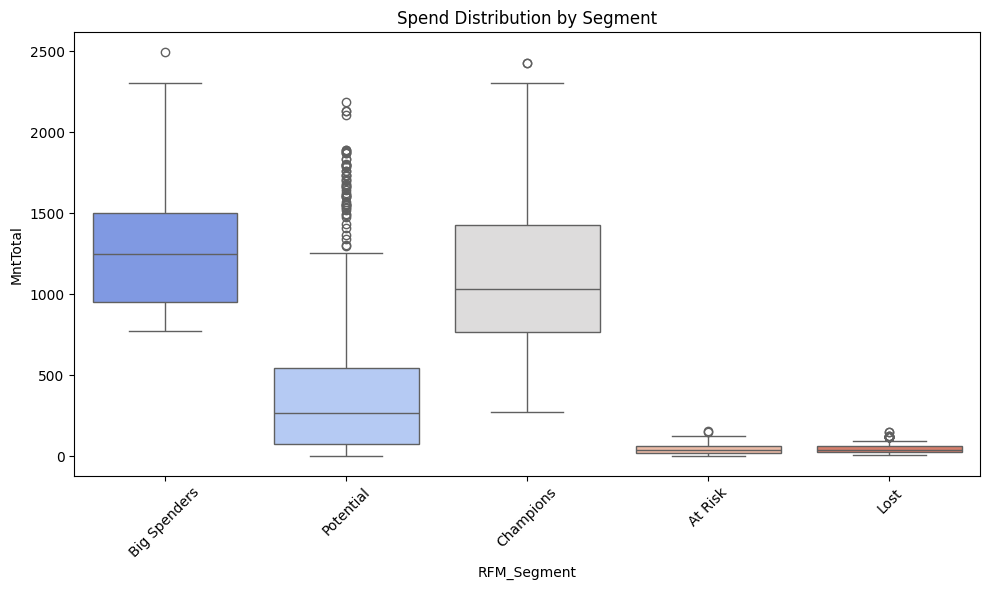

In [198]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='RFM_Segment', y='MntTotal', palette='coolwarm')
plt.title('Spend Distribution by Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [199]:
q_high = data['MntTotal'].quantile(0.95)
data['MntTotal']=np.where(data['MntTotal'] > q_high, q_high, data['MntTotal'])

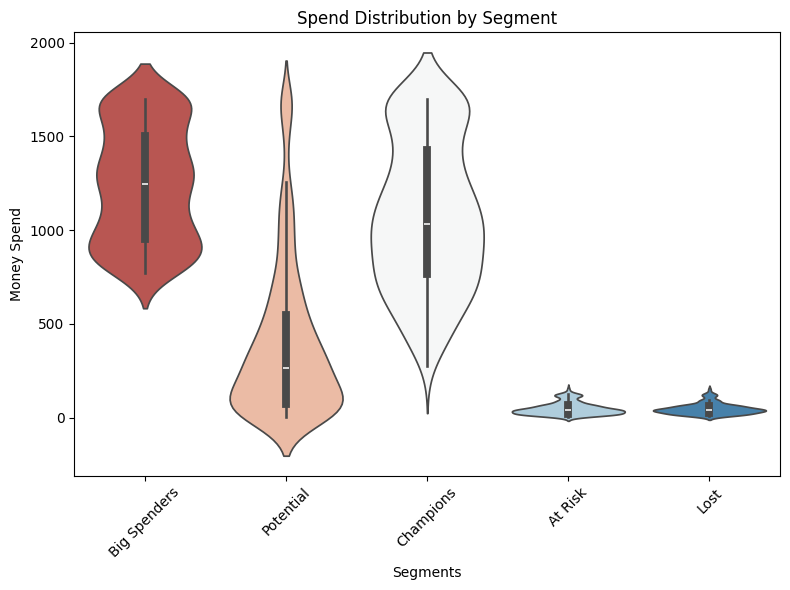

In [200]:
plt.figure(figsize= (8,6))
sns.violinplot(data= data, x= 'RFM_Segment', y= 'MntTotal', hue= 'RFM_Segment', palette= 'RdBu')
plt.title('Spend Distribution by Segment')
plt.xlabel('Segments')
plt.ylabel('Money Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

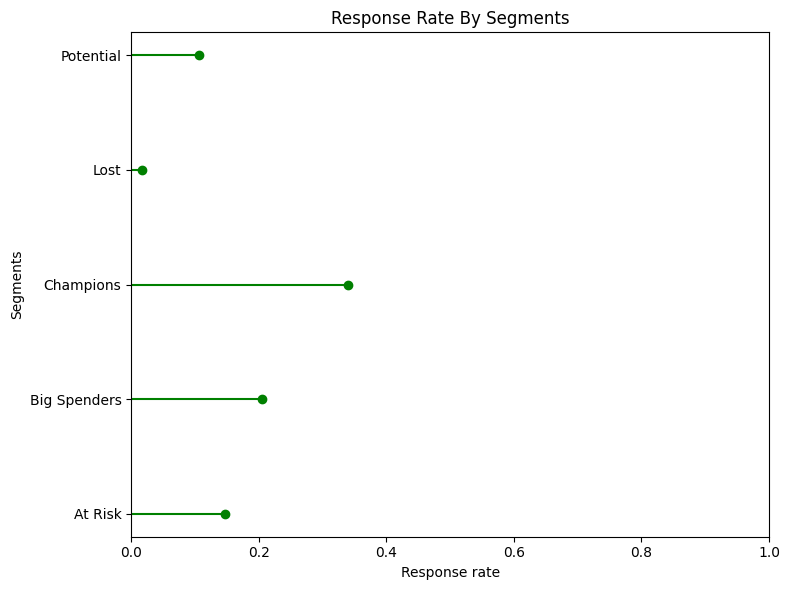

In [201]:
# Response rate by segment 

response_rate = data.groupby('RFM_Segment')['Response'].mean().reset_index()

plt.figure(figsize= (8,6))
segments = response_rate['RFM_Segment']
values = response_rate['Response']
plt.hlines(y=segments, xmin=0, xmax=values, colors='green')
plt.plot(values, segments,'o', color='green')
plt.title('Response Rate By Segments')
plt.xlabel('Response rate')
plt.ylabel('Segments')
plt.xlim(0,1)
plt.tight_layout()
plt.show()

In [202]:
rfm_data = data[['Recency','Frequency','MntTotal']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

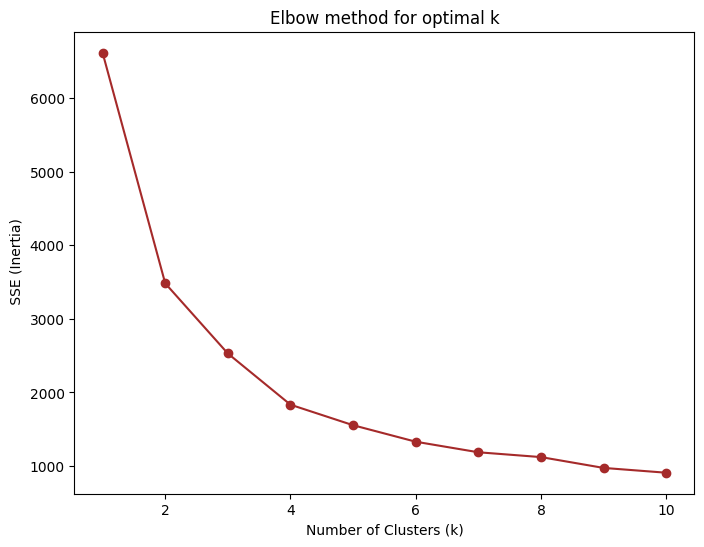

In [203]:

sse = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize= (8,6))
plt.plot(k_range, sse, marker= 'o', color = 'Brown')
plt.xlabel('Number of Clusters (k)')
plt.ylabel(' SSE (Inertia)')
plt.title('Elbow method for optimal k')
plt.show()

In [204]:
# optimal k = 4
# Applying K-Means 

kmeans = KMeans(n_clusters=4, random_state=42)
rfm_data['cluster'] = kmeans.fit_predict(rfm_scaled)


C:\Users\HP\AppData\Local\Temp\ipykernel_12084\939161267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['cluster'] = kmeans.fit_predict(rfm_scaled)


In [205]:
cluster_summary = rfm_data.groupby('cluster')[['Recency', 'Frequency', 'MntTotal']].mean().round(1)
print(cluster_summary)

         Recency  Frequency  MntTotal
cluster                              
0           72.6       21.6    1064.7
1           24.5        8.7     109.7
2           74.6        9.1     119.8
3           22.6       21.8    1023.9


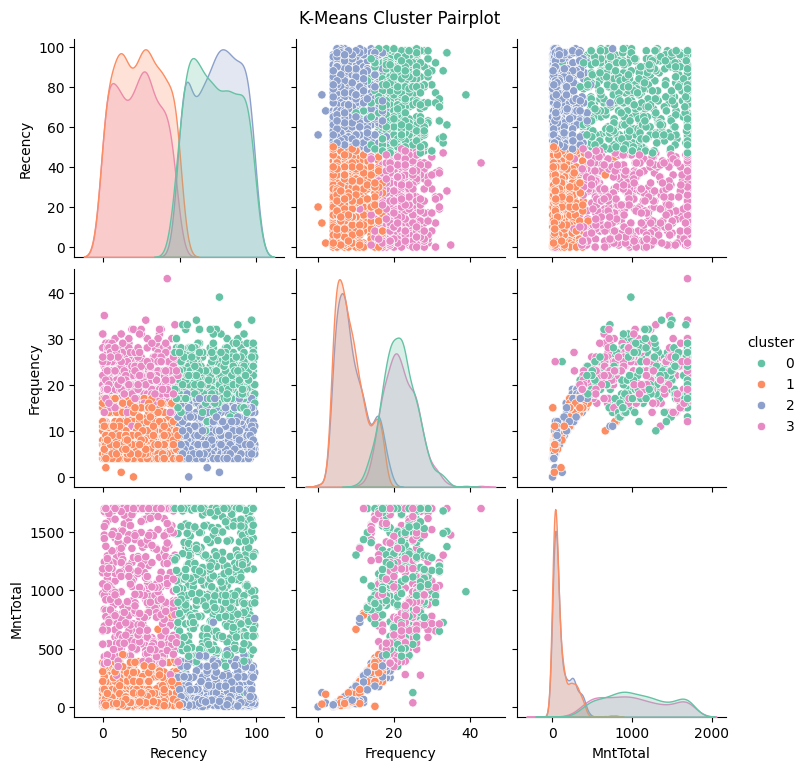

In [206]:
sns.pairplot(rfm_data, hue= 'cluster', vars= ['Recency', 'Frequency', 'MntTotal'], palette= 'Set2' )
plt.suptitle('K-Means Cluster Pairplot', y=1.02)
plt.show()

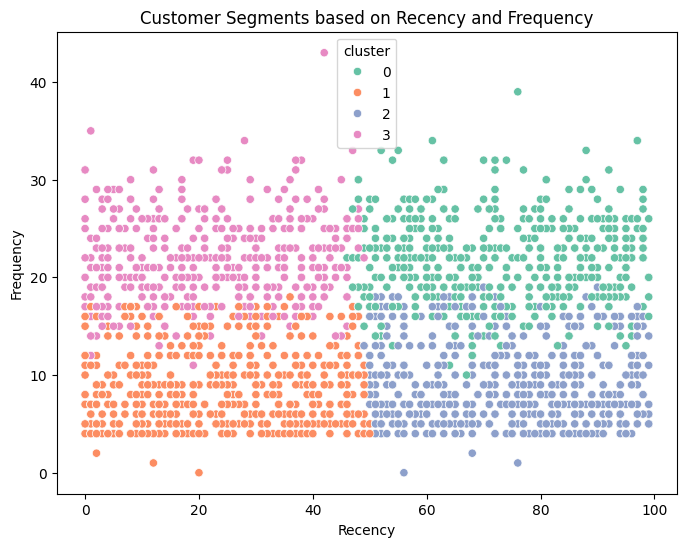

In [207]:
plt.figure(figsize= (8,6))
sns.scatterplot(data = rfm_data, x= 'Recency', y= 'Frequency', hue= 'cluster', palette= 'Set2')
plt.title('Customer Segments based on Recency and Frequency')
plt.show()

In [208]:
#optimal k=5
kmeans1 = KMeans(n_clusters=5, random_state=42)
rfm_data['cluster'] = kmeans1.fit_predict(rfm_scaled)

cluster_summary1 = rfm_data.groupby('cluster')[['Recency', 'Frequency', 'MntTotal']].mean().round(1)
print(cluster_summary1)

         Recency  Frequency  MntTotal
cluster                              
0           23.3       22.6    1282.3
1           25.9        7.3      69.2
2           76.8        8.8     109.0
3           30.1       18.7     489.6
4           74.8       21.6    1080.8


C:\Users\HP\AppData\Local\Temp\ipykernel_12084\3563040243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_data['cluster'] = kmeans1.fit_predict(rfm_scaled)


In [209]:
from mpl_toolkits.mplot3d import Axes3D

cluster_summary1 = pd.DataFrame({
    'Recency': [66.3, 74.5, 19.1, 69.6, 23.8],
    'Frequency': [22.5, 7.8, 21.8, 19.9, 8.6],
    'MntTotal': [1546.2, 81.9, 985.5, 662.7, 107.3],
}, index= [0, 1, 2, 3, 4])

labels = {
    0: "Big Spenders",
    1: "Lost Customers",
    2: "Champions",
    3: "Potential Loyalists",
    4: "New/At Risk"
}

cluster_summary1['segment'] = cluster_summary1.index.map(labels)
cluster_summary1

,Recency,Frequency,MntTotal,segment
0,66.3,22.5,1546.2,Big Spenders
1,74.5,7.8,81.9,Lost Customers
2,19.1,21.8,985.5,Champions
3,69.6,19.9,662.7,Potential Loyalists
4,23.8,8.6,107.3,New/At Risk


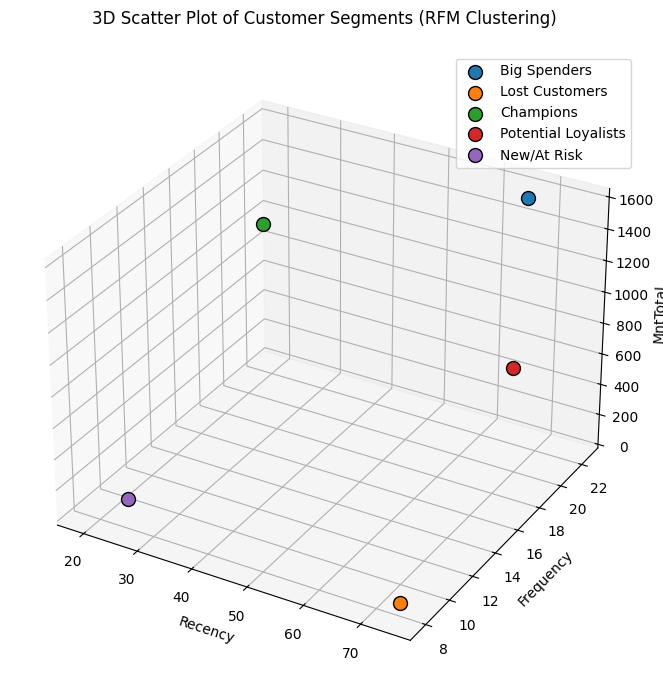

In [210]:
fig =  plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] 

for idx, row in cluster_summary1.iterrows():
    ax.scatter(row['Recency'], row['Frequency'], row['MntTotal'], color= colors[idx], 
               label= row['segment'], s=100, edgecolors='black')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MntTotal')
ax.set_title('3D Scatter Plot of Customer Segments (RFM Clustering)', pad=20)
ax.legend()
plt.tight_layout()
plt.show()

In [211]:
rfm_data = pd.DataFrame({
    'Recency': rfm_data['Recency'],
    'Frequency': rfm_data['Frequency'],
    'MntTotal': rfm_data['MntTotal'],
    'Cluster': rfm_data['cluster']
})

labels = {
    0: "Big Spenders",
    1: "Lost Customers",
    2: "Champions",
    3: "Potential Loyalists",
    4: "New/At Risk"
}

rfm_data['Segment'] = rfm_data['Cluster'].map(labels)
rfm_data

,Recency,Frequency,MntTotal,Cluster,Segment
0,58,25,1529.0,4,New/At Risk
1,38,6,21.0,1,Lost Customers
2,26,21,734.0,3,Potential Loyalists
3,26,8,48.0,1,Lost Customers
4,94,19,407.0,4,New/At Risk
...,...,...,...,...,...
2200,46,18,1094.0,0,Big Spenders
2201,56,22,436.0,3,Potential Loyalists
2202,91,19,1217.0,4,New/At Risk
2203,8,23,782.0,0,Big Spenders


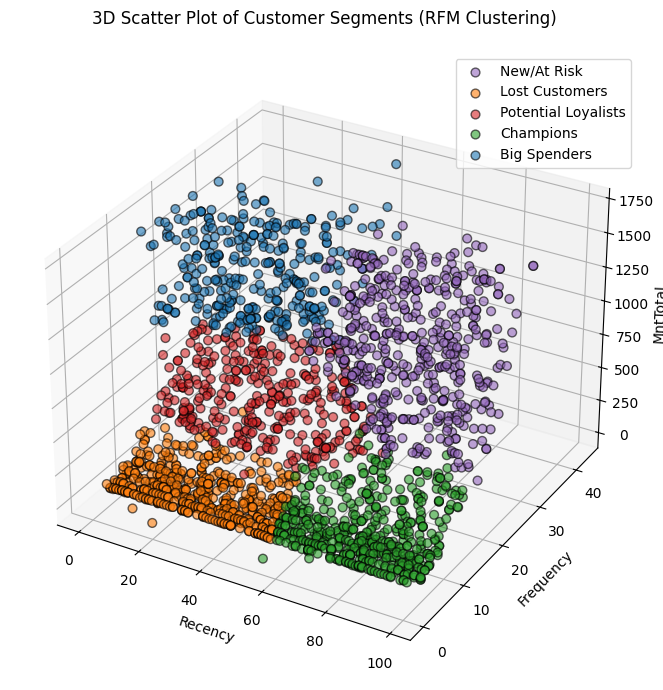

In [212]:
fig =  plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] 
color_dict = {label: color for label, color in zip(labels.values(), colors)}

for segment in rfm_data['Segment'].unique():
    subset = rfm_data[rfm_data['Segment']== segment]
    ax.scatter(subset['Recency'], subset['Frequency'], subset['MntTotal'], color= color_dict[segment], 
               label= segment, alpha=0.6, s=40, edgecolors='black')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MntTotal')
ax.set_title('3D Scatter Plot of Customer Segments (RFM Clustering)', pad=20)
ax.legend()
plt.tight_layout()
plt.show()